<a href="https://colab.research.google.com/github/lelyta30/PCVK_GENAP_2023/blob/main/Final_Project_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name : Lelyta Salsabila

Class : 3I

NIM : 1941720026

**About**

In this project, I used Hybrid deep CNN transfer learning on rice plant images, classifying and identifying various rice diseases. I used Transfer Learning to generate our deep learning model using the Rice Leaf Dataset from a secondary source. The proposed model is 90.8% accurate.


In [1]:
#untuk connect ke gdrive
## Mounting Google Drive
from google.colab import drive, files
drive.mount('/content/drive')
from __future__ import absolute_import, print_function,division, unicode_literals # impor absolut dengan Python
import os.path #berfungsi untuk memanipulasi jalur (path) file dan direktori.
import glob #mencocokkan file dan direktori dengan pola tertentu
import shutil#berfungsi untuk mengoperasikan file dan direktori

import tensorflow as tf #pustaka yang digunakan
assert tf.__version__.startswith('2') #versi TensorFlow

from tensorflow import keras #Mengimport Keras dari TensorFlow
from tensorflow.keras.models import Sequential #Mengimport kelas Sequential untuk membuat model berurutan secara bertahap
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Mengimport kelas ImageDataGenerator untuk melakukan augmentasi data gambar
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation #Mengimport beberapa lapisan
from keras import regularizers #untuk regularisasi
import keras #Mengimport NumPy

import numpy as np
import matplotlib.pyplot as plt #Mengimport modul pyplot dari pustaka Matplotlib
import pathlib

Mounted at /content/drive


In [2]:
BATCH_SIZE = 8 #jumlah sampel yang diproses, setiap batch ada 8 sampel
IMG_HEIGHT = 224 #untuk tinggi gambar
IMG_WIDTH = 224 #untuk lebar gambar

In [3]:
data_dir ="/content/drive/MyDrive/PCVK/Rice Leaf Disease" #direktori dataset gambar
data_dir = pathlib.Path(data_dir) #untuk melakukan operasi file dan direktori pada path yang diberikan

CLASS_NAMES = np.array(['Bacterial leaf blight','Brown spot','Leaf smut']) #array numpy yang berisi daftar nama kelas

print('Class Names: ', CLASS_NAMES) #untuk mencetak daftar nama kelas

Class Names:  ['Bacterial leaf blight' 'Brown spot' 'Leaf smut']


In [4]:
#menentukan direktori untuk data train dan test
train_path = '/content/drive/MyDrive/PCVK/Rice Leaf Disease'
test_path = '/content/drive/MyDrive/PCVK/Rice Leaf Disease'

In [5]:
#ntuk melakukan augmentasi gambar
image_train_gen = ImageDataGenerator(rescale=1./255, #Mengubah rentang piksel gambar menjadi 1 dibagi 255 setiap piksel
                                     zoom_range=0.50, #zoom pada gambar hingga 50%
                                     rotation_range=45, #rotasi gambar hingga 45 derajat
                                     horizontal_flip=True, #Menerapkan flip horizontal pada gambar
                                     width_shift_range=0.15, #memperlebar hingga 15% dari dimensi lebar gambar
                                     height_shift_range=0.15) #mempertinggi hingga 15% dari dimensi tinggi gambar
#memuat dan memproses data dari direktori
train_data_gen = image_train_gen.flow_from_directory(train_path, #path trainnya
                                                     shuffle=True, #data akan diacak setiap epoch
                                                     batch_size=BATCH_SIZE, #Ukuran batch data
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH), #Ukuran gambar target
                                                     class_mode='sparse') #Mode kelas yang direpresentasikan dengan bilangan bulat

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [6]:
#memvisualisasikan beberapa gambar dalam satu baris
def plotImages(image_arr): #Array gambar yang akan diplot
    fig,axes = plt.subplots(1, 5, figsize=(20,20)) #berfungsi membuat 1 baris dengan 5 kolom subplot, dengan ukuran (20, 20).
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes): #setiap gambar ditampilkan dalam subplot menggunakan loop
        ax.imshow(img)
    plt.tight_layout() #memastikan tata letak plot yang rapi
    plt.show() #menampilkan plot

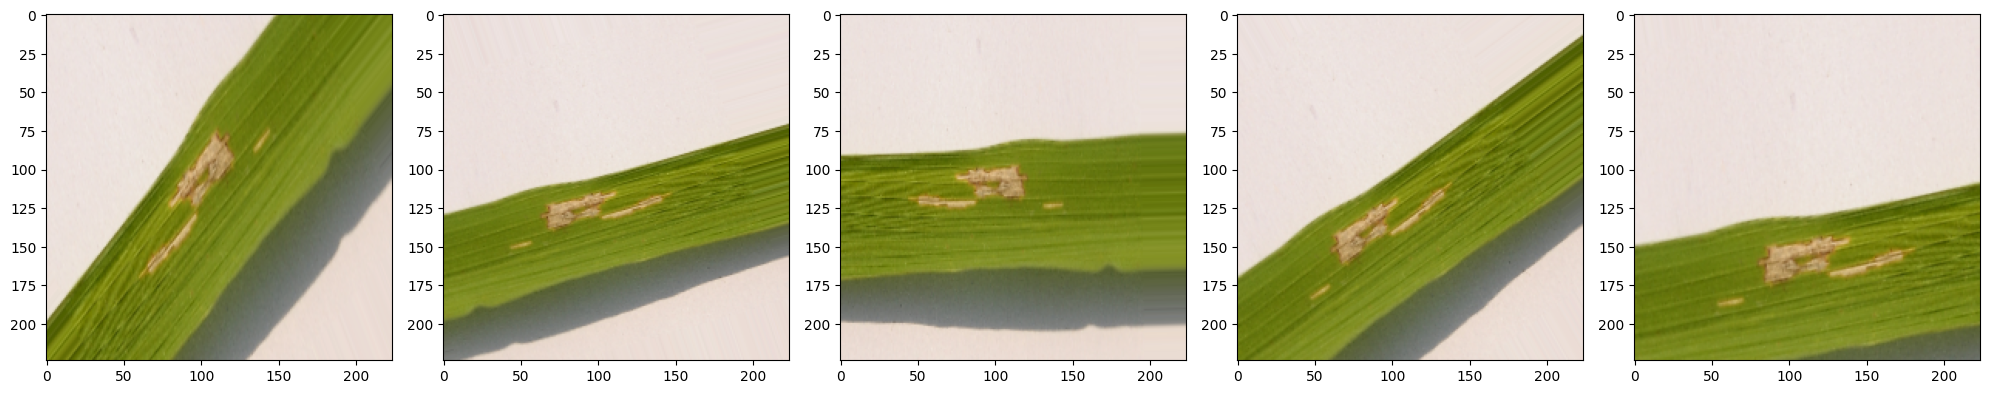

In [7]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)] #mengambil 5 gambar pertama dari generator train_data_gen
plotImages(img_array) #memplot gambar satu baris dengan 5 kolom

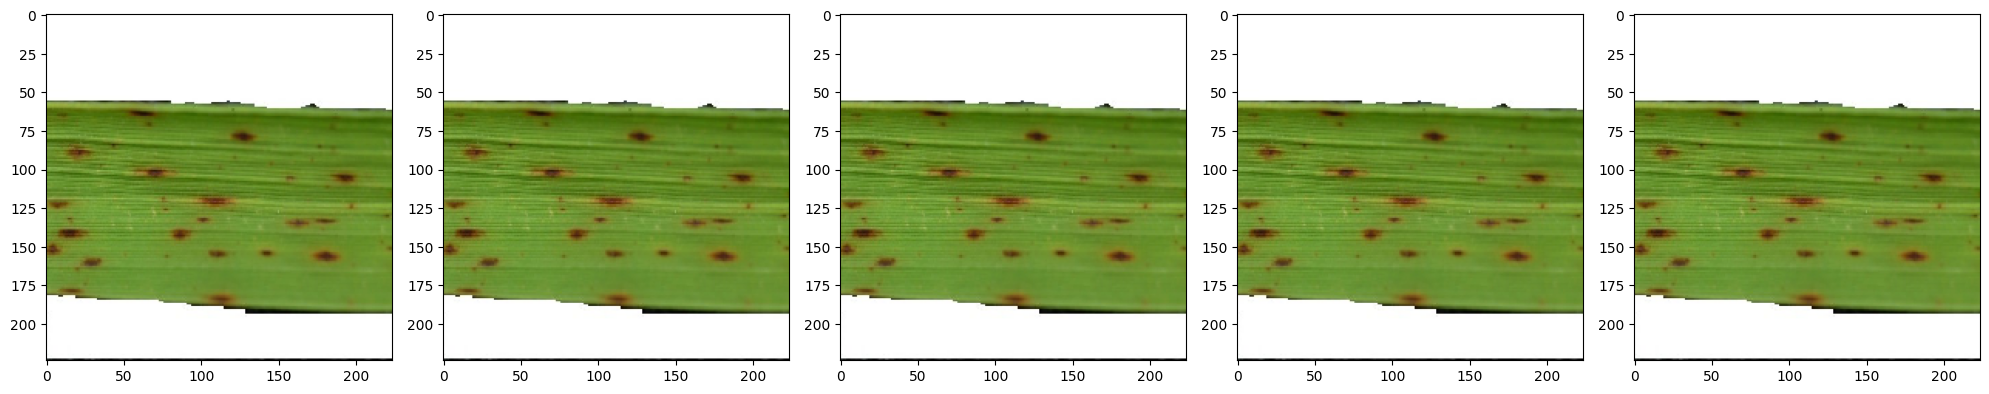

In [8]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [9]:
# Model building CNN

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
#layer Convolutional 2D dengan 16 filter 3x3 dengan ukuran gambar 224x224 piksel dengan 3 channel (RGB) dan aktivasinya menggunakan relu
model.add(MaxPooling2D(pool_size = (2,2))) #Menambahkan layer Max Pooling 2D dengan ukuran pool 2x2 untuk melakukan subsampling
model.add(Conv2D(32, (3,3), activation="relu")) #layer Convolutional 2D dengan 32 filter 3x3 dan aktivasinya menggunakan relu
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu")) #layer Convolutional 2D dengan 64 filter 3x3 dan aktivasinya menggunakan relu
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #mengubah representasi matriks 2D menjadi vektor 1D
model.add(Dropout(0.2)) #tingkat dropout sebesar 0.2 untuk mencegah overfitting
model.add(Dense(128,activation="relu")) #Menambahkan layer Dense (fully connected) dengan 128 unit dan menggunakan fungsi aktivasi ReLU
model.add(Dropout(0.2)) #layer Dropout dengan tingkat dropout sebesar 0.2 juga
model.add(Dense(3, activation="softmax")) #Menambahkan layer Dense dengan 3 kelas dan aktivasi softmax untuk klasifikasi multi-kelas

model.compile( #mengompilasi model dengan beberapa parameter
    optimizer = "adam", #metode optimasi populer dalam deep learning
    loss = "sparse_categorical_crossentropy", #untuk klasifikasi multi-kelas
    metrics = ['accuracy'] #mengukur akurasi model
)

model.summary() #menampilkan ringkasan model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [10]:
EPOCHS=70 ##epoch yang digunakan adalah 70
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen) #Generator ini menggunakan metode dan yang divalidasi dibuat sebelumnya

<ipython-input-10-80190e970e5b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen) #Generator menggunakan metode dan yang divalidasi dibuat sebelumnya


Epoch 1/70
15/15 [==============================] - 49s 3s/step - loss: 1.4794 - accuracy: 0.3167 - val_loss: 1.0876 - val_accuracy: 0.3833
Epoch 2/70
15/15 [==============================] - 22s 2s/step - loss: 1.1010 - accuracy: 0.3167 - val_loss: 1.0555 - val_accuracy: 0.3333
Epoch 3/70
15/15 [==============================] - 23s 2s/step - loss: 1.0964 - accuracy: 0.3833 - val_loss: 1.0935 - val_accuracy: 0.4667
Epoch 4/70
15/15 [==============================] - 19s 1s/step - loss: 1.0978 - accuracy: 0.3250 - val_loss: 1.0870 - val_accuracy: 0.3333
Epoch 5/70
15/15 [==============================] - 23s 2s/step - loss: 1.0880 - accuracy: 0.3500 - val_loss: 1.0660 - val_accuracy: 0.5083
Epoch 6/70
15/15 [==============================] - 23s 2s/step - loss: 1.0385 - accuracy: 0.4417 - val_loss: 0.9111 - val_accuracy: 0.4917
Epoch 7/70
15/15 [==============================] - 22s 1s/step - loss: 0.9916 - accuracy: 0.5000 - val_loss: 0.9510 - val_accuracy: 0.5083
Epoch 8/70
15/15 [==

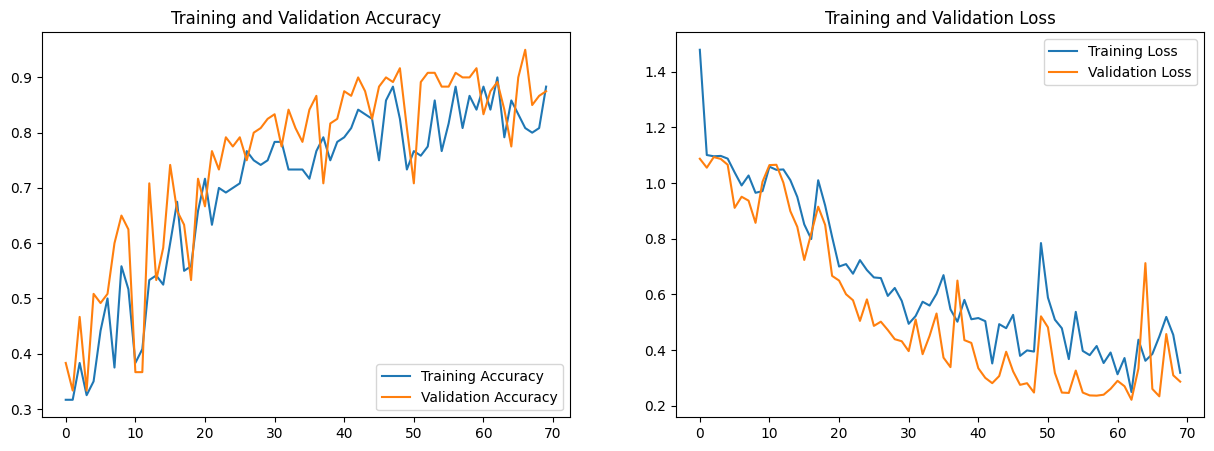

In [11]:
# Plot training and validation graphs
#untuk menganalisis performa model
acc = history.history['accuracy'] #mengambil nilai akurasi pelatihan dari setiap epoch dan menyimpannya dalam variabel acc
val_accuracy = history.history['val_accuracy'] #mengambil nilai akurasi validasi dari setiap epoch dan menyimpannya dalam variabel val_accuracy

loss = history.history['loss'] #yang ini tersimpannya di variabel loss
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS) #menentukan nilai sumbu x dari grafik akurasi dan loss

plt.figure(figsize=(15,5)) #figure dengan ukuran 15 x 5
plt.subplot(1,2,1) #terdapat dua subplot dalam satu baris, dan ini subplot pertama
plt.plot(epochs_range,acc,label='Training Accuracy') #plotting epochs_range pada sumbu x dan y menggunakan variabel Training Accuracy
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy') #plotting akurasi validasi sumbu y
plt.legend(loc='lower right') #menampilkan legenda pada sudut kanan bawah plot
plt.title('Training and Validation Accuracy') #judul pada plot

plt.subplot(1,2,2) #subplot kedua variabel loss
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right') #menampilkan legenda pada sudut kanan atas plot
plt.title('Training and Validation Loss') #judul pada plot
plt.show()